## About the Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

FEATURES:
    
Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [2]:
train=pd.read_csv("BigMart-Sales-Price-Prediction-project/bigdatamart_Train.csv")
test=pd.read_csv("BigMart-Sales-Price-Prediction-project/bigdatamart_Test.csv")

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


Train Data has 8523 rows and 12 columns out of which 11 columns are independent features and 1 column['item_outlet_sales'] is target column.

In [4]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


Test data has 5681 rows and 11 columns which are all independent features. We have to predict target values from ML of train data.

In [5]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

We need to predict Item_Outlet_Sales for given test data

### Joining Train and Test Dataset for EDA

Creating source column to separate the data easily later.

In [8]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [9]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,test


In [10]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

There are 2439 null values in Item weight and 4016 null values in Outlet Size

In [12]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

8 columns are categorical type, rest 5 columns are either float or int type.

In [13]:
data['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 3608.636 , 2778.3834,
          0.    ])

In [14]:
print(data['Item_Outlet_Sales'].value_counts())

0.0000       5681
958.7520       17
1342.2528      16
1845.5976      15
703.0848       15
             ... 
4873.6560       1
876.1928        1
4290.4152       1
3265.7490       1
3653.9104       1
Name: Item_Outlet_Sales, Length: 3494, dtype: int64


## EDA

In [15]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [16]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [17]:
# For numerical Type

data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Some observations:

Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.

In [18]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable.

### Imputing Missing Values

In [19]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [20]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [21]:
# To fill the nan value in outlet
# Since outlet size is a categorical type data, i am using Medium/Mode to replace nan values.
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data['Outlet_Size'].isnull().sum()

0

In [22]:
data['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [23]:
#Filling Null values in Item_Weight with mean value as it is a float data type
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())
data['Item_Weight'].isnull().sum()

0

Crosschecking for any null values after filling

In [24]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [25]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.234226,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,9.300000,0.027036,94.012000,1987.000000,0.000000
50%,12.792854,0.054021,142.247000,1999.000000,559.272000
75%,16.000000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
data['Item_Visibility'].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [27]:
data[data.Item_Visibility == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.200000,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395000,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,12.792854,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,0.0000,test
5648,FDK26,12.792854,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test
5654,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,0.0000,test
5661,DRG37,12.792854,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,0.0000,test


There Are 879 rows with 0 value as item visibility. We will convert it to nan value and replace it with mean value of item visibility values.

Modify Item_Visibility

We noticed that the minimum value here is 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.

In [28]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [29]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.069710,141.004977,1997.830681,1308.865489
std,4.234226,0.049728,62.086938,8.371664,1699.791423
min,4.555000,0.003575,31.290000,1985.000000,0.000000
25%,9.300000,0.031145,94.012000,1987.000000,0.000000
50%,12.792854,0.057194,142.247000,1999.000000,559.272000
75%,16.000000,0.096930,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


There are some 0 values in target variable i.e. item_Outlet_Sales. Those are from test data which we have to predict.

In [30]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

Again checking for null values

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

Now there is no null value in the dataset

In [32]:
data.nunique()

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13688
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [33]:
#frequency of categories
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
NCS29    10
FDD38    10
FDC14    10
FDH28    10
FDZ56    10
         ..
FDR51     7
FDX49     7
FDM50     7
NCL42     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548


### Create a broad category of Type of Item

Earlier we saw that the Item_Type variable has 16 categories which might prove to be very useful in analysis. So its a good idea to combine them. One way could be to manually assign a new category to each. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I’ve used the Item_Identifier variable to create a new column:

In [34]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [35]:
#Since Item identifier and Outlet identifier has string data type. And it is of not much use in our ML. So droping these two columns.
data.drop(['Item_Identifier','Outlet_Identifier'], axis = 1,inplace=True)

### Univatiate analysis

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

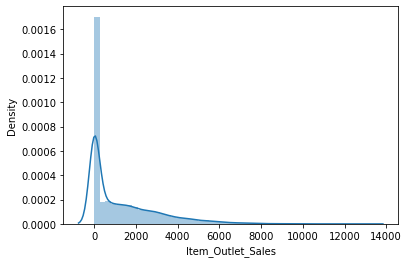

In [36]:
sns.distplot(data['Item_Outlet_Sales'])

This plot shows that the targer column is right skewed

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

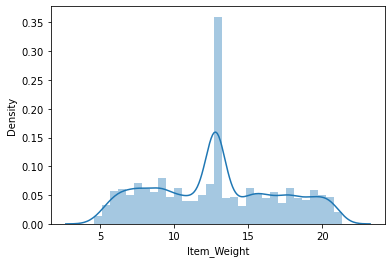

In [37]:
sns.distplot(data["Item_Weight"])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

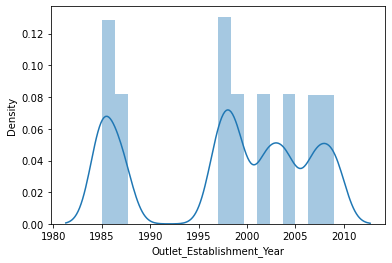

In [38]:
sns.distplot(data["Outlet_Establishment_Year"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

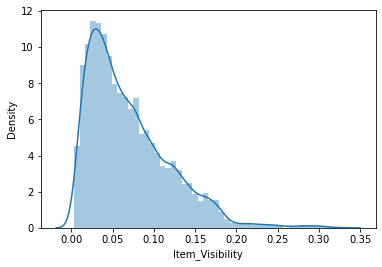

In [39]:
sns.distplot(data["Item_Visibility"])

Its right skewed

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

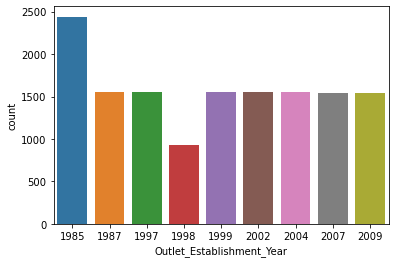

In [40]:
sns.countplot(data['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

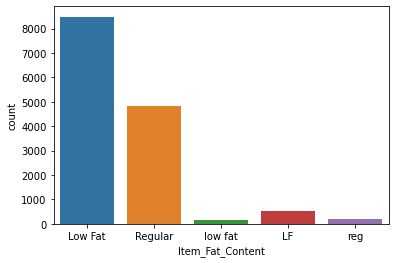

In [41]:
sns.countplot(data['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

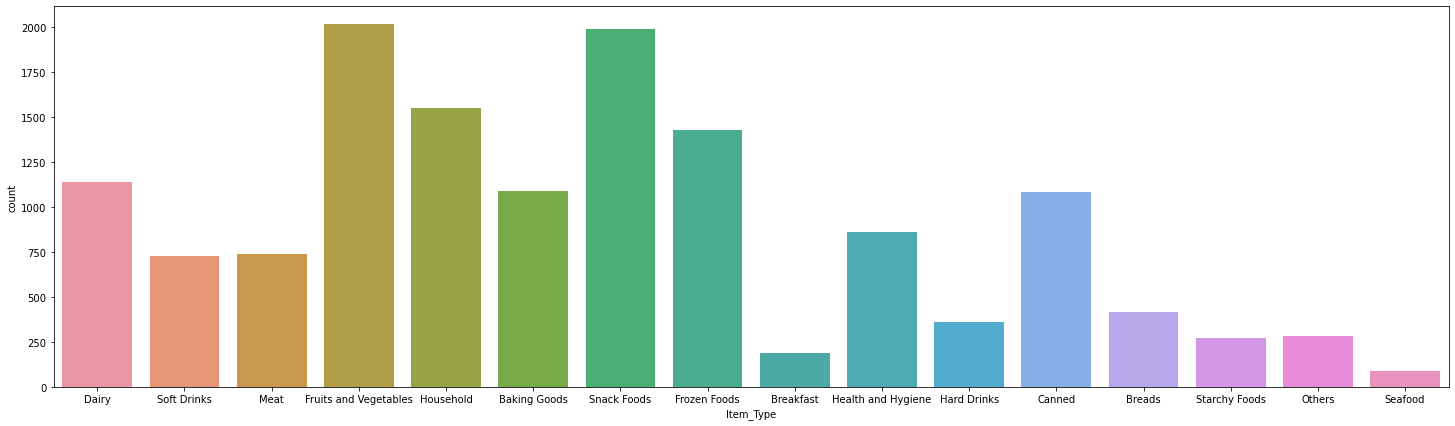

In [42]:
plt.figure(figsize=(25,7))
sns.countplot(data['Item_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

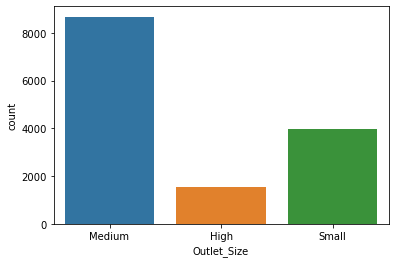

In [43]:
sns.countplot(data['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

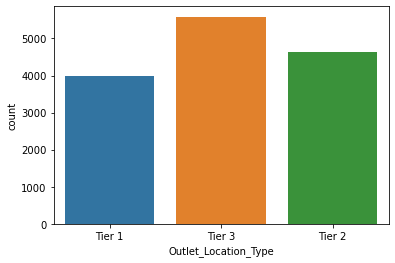

In [44]:
sns.countplot(data['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

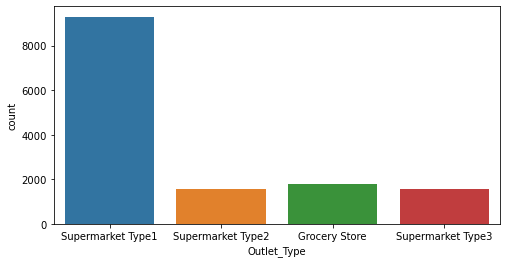

In [45]:

plt.figure(figsize=(8,4))
sns.countplot(data['Outlet_Type'])

### Bivariate analysis

<AxesSubplot:title={'center':'comparison between Item_Weight and Item_Outlet_Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

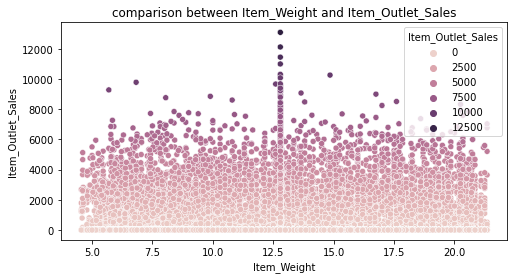

In [46]:
plt.figure(figsize=[8,4])
plt.title("comparison between Item_Weight and Item_Outlet_Sales")
sns.scatterplot(data['Item_Weight'],data['Item_Outlet_Sales'],hue=data["Item_Outlet_Sales"])

It gives the distribution of Item_Outlet_Sales over item_Weight

<AxesSubplot:title={'center':'comparison between Item_MRP and Item_Outlet_Sales'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

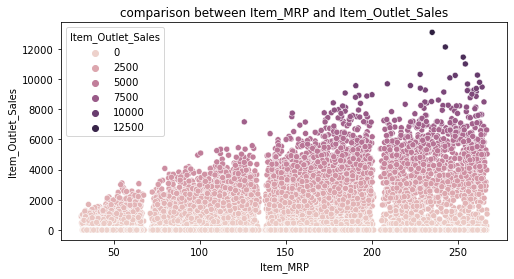

In [47]:
plt.figure(figsize=[8,4])
plt.title("comparison between Item_MRP and Item_Outlet_Sales")
sns.scatterplot(data['Item_MRP'],data['Item_Outlet_Sales'],hue=data["Item_Outlet_Sales"])

It gives the distribution of Item_Outlet_Sales over item_MRP

<AxesSubplot:title={'center':'comparison between Item_Visibility and Item_Outlet_Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

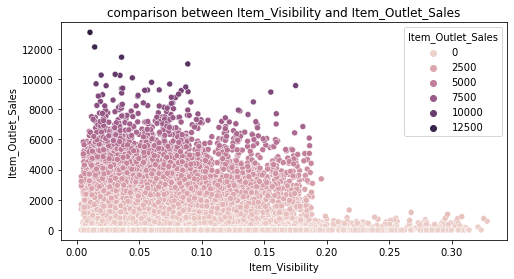

In [48]:
plt.figure(figsize=[8,4])
plt.title("comparison between Item_Visibility and Item_Outlet_Sales")
sns.scatterplot(data['Item_Visibility'],data['Item_Outlet_Sales'],hue=data["Item_Outlet_Sales"])

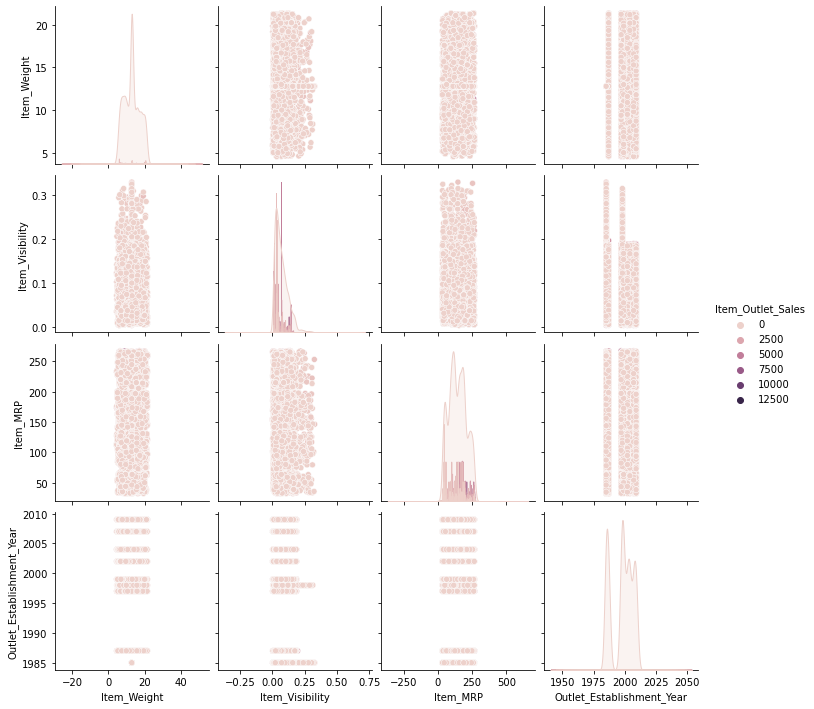

In [49]:
sns.pairplot(data,hue='Item_Outlet_Sales')

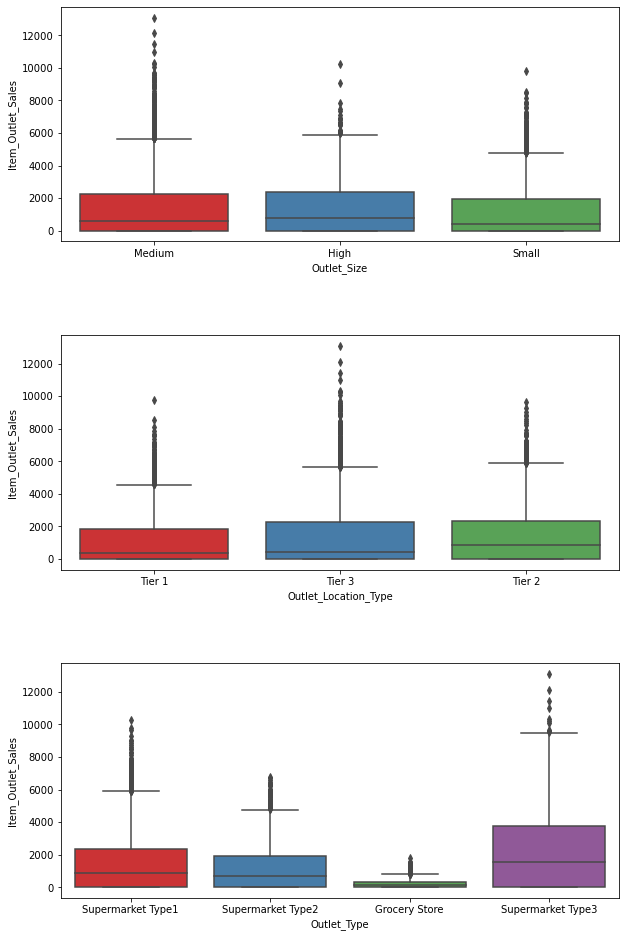

In [50]:
#Lets start looking Outlet_Size, Outlet_Location_Type, and Outlet_Type distribution in Item_Outlet_Sale

plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [51]:
#Change categories of low fat:
print('Original Fat Content')
print(data['Item_Fat_Content'].value_counts())
print('\n')
print('New Fat Content')
data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)
print(data['Item_Fat_Content'].value_counts())

Original Fat Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


New Fat Content
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=data.apply(LabelEncoder().fit_transform)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,284,0,1163,4,7567,4,1,0,1,2541,1,1
1,57,1,1534,14,632,8,1,2,2,423,1,0
2,376,0,1246,10,3897,4,1,0,1,1640,1,1
3,393,1,1376,6,5626,3,1,2,0,671,1,1
4,265,0,336,9,848,1,0,2,1,866,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,298,1,765,13,3881,2,2,0,1,0,0,1
5677,180,1,12464,15,5069,8,1,2,2,0,0,1
5678,293,0,8450,8,3196,5,1,1,1,0,0,2
5679,354,1,9673,3,6626,7,1,1,1,0,0,1


In [53]:
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
Item_Type_Combined           0
dtype: int64

In [54]:
cor=df.corr()
cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
Item_Weight,1.000000,-0.029776,-0.011110,0.036341,0.024470,-0.079270,0.019498,0.009454,0.054561,0.017909,0.015594,0.051836
Item_Fat_Content,-0.029776,1.000000,0.055468,-0.147733,-0.004092,0.000142,-0.000634,0.001373,-0.000228,0.009110,-0.001687,-0.167227
Item_Visibility,-0.011110,0.055468,1.000000,-0.053640,0.000384,-0.064387,0.044910,-0.013365,-0.121875,-0.055423,0.004070,-0.070464
Item_Type,0.036341,-0.147733,-0.053640,1.000000,0.048657,0.003295,-0.002608,0.002083,0.004305,0.010160,-0.000782,0.011683
Item_MRP,0.024470,-0.004092,0.000384,0.048657,1.000000,0.000203,-0.001096,0.000994,0.000064,0.306767,-0.000397,0.030946
Outlet_Establishment_Year,-0.079270,0.000142,-0.064387,0.003295,0.000203,1.000000,0.070796,0.041889,-0.040255,0.013212,0.000186,-0.002365
Outlet_Size,0.019498,-0.000634,0.044910,-0.002608,-0.001096,0.070796,1.000000,-0.614300,-0.201505,-0.053097,-0.000072,0.002040
Outlet_Location_Type,0.009454,0.001373,-0.013365,0.002083,0.000994,0.041889,-0.614300,1.000000,0.467251,0.039912,0.000023,-0.002572
Outlet_Type,0.054561,-0.000228,-0.121875,0.004305,0.000064,-0.040255,-0.201505,0.467251,1.000000,0.226293,-0.000094,-0.001956
Item_Outlet_Sales,0.017909,0.009110,-0.055423,0.010160,0.306767,0.013212,-0.053097,0.039912,0.226293,1.000000,0.724052,0.005094


Item_visibility and aoutlet_size is negatively correlated with target variables.  others are positively correlated with the target.

<AxesSubplot:>

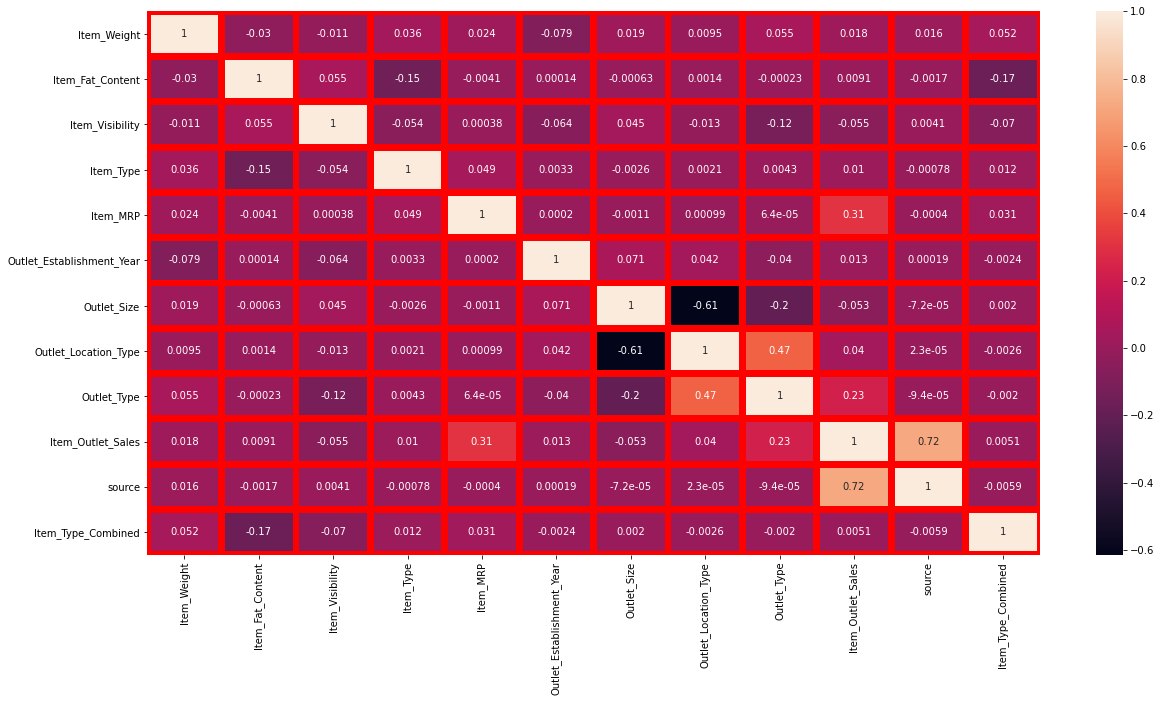

In [55]:
plt.figure(figsize=[20,10])
sns.heatmap(cor,annot=True,linewidths=6,linecolor='r')

## Outlier removing

Item_Weight                      AxesSubplot(0.125,0.71587;0.0945122x0.16413)
Item_Fat_Content              AxesSubplot(0.238415,0.71587;0.0945122x0.16413)
Item_Visibility               AxesSubplot(0.351829,0.71587;0.0945122x0.16413)
Item_Type                     AxesSubplot(0.465244,0.71587;0.0945122x0.16413)
Item_MRP                      AxesSubplot(0.578659,0.71587;0.0945122x0.16413)
Outlet_Establishment_Year     AxesSubplot(0.692073,0.71587;0.0945122x0.16413)
Outlet_Size                   AxesSubplot(0.805488,0.71587;0.0945122x0.16413)
Outlet_Location_Type            AxesSubplot(0.125,0.518913;0.0945122x0.16413)
Outlet_Type                  AxesSubplot(0.238415,0.518913;0.0945122x0.16413)
Item_Outlet_Sales            AxesSubplot(0.351829,0.518913;0.0945122x0.16413)
source                       AxesSubplot(0.465244,0.518913;0.0945122x0.16413)
Item_Type_Combined           AxesSubplot(0.578659,0.518913;0.0945122x0.16413)
dtype: object

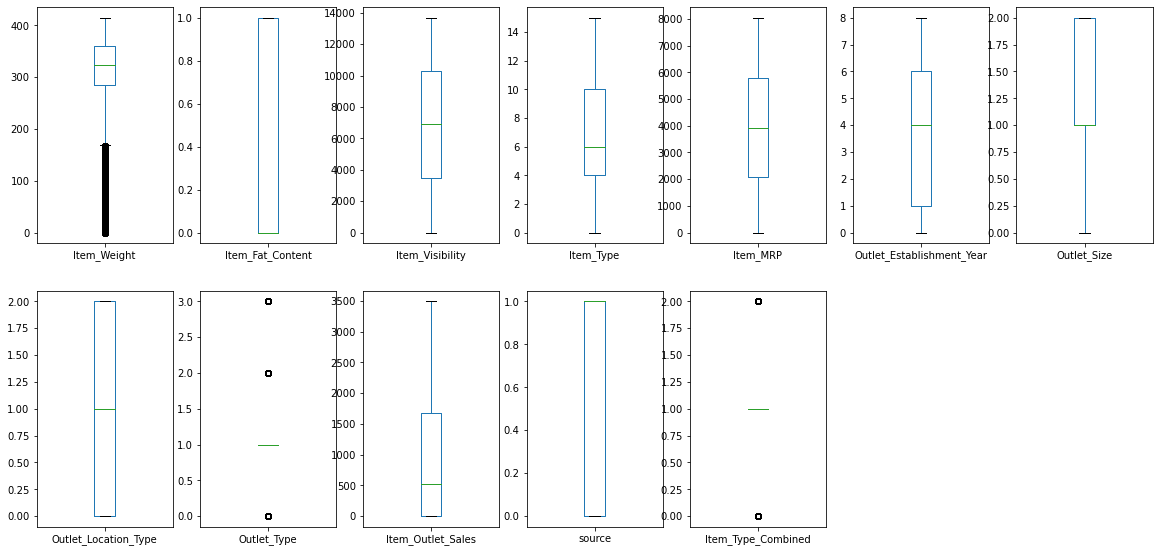

In [56]:
df.plot(kind='box',subplots=True,layout=(4,7),figsize=(20,20))

There are few outliers in Item_weight, Item_type combaned, outlet_type

In [57]:
from scipy.stats import zscore

In [58]:
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [59]:
new_df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined
0,284,0,1163,4,7567,4,1,0,1,2541,1,1
1,57,1,1534,14,632,8,1,2,2,423,1,0
2,376,0,1246,10,3897,4,1,0,1,1640,1,1
3,393,1,1376,6,5626,3,1,2,0,671,1,1
4,265,0,336,9,848,1,0,2,1,866,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,298,1,765,13,3881,2,2,0,1,0,0,1
5677,180,1,12464,15,5069,8,1,2,2,0,0,1
5678,293,0,8450,8,3196,5,1,1,1,0,0,2
5679,354,1,9673,3,6626,7,1,1,1,0,0,1


In [60]:
df.shape,new_df.shape

((14204, 12), (14139, 12))

In [61]:
#Percentage data loss

loss_percent=(14204-14139)/14204*100
print(loss_percent)

0.4576175725147845


Only 0.45% of data is lost.

## skewness

In [62]:
new_df.skew()

Item_Weight                 -1.394314
Item_Fat_Content             0.615275
Item_Visibility             -0.006702
Item_Type                    0.095786
Item_MRP                     0.024977
Outlet_Establishment_Year    0.035902
Outlet_Size                 -0.086852
Outlet_Location_Type        -0.209821
Outlet_Type                  0.925081
Item_Outlet_Sales            0.804123
source                      -0.407871
Item_Type_Combined           0.119070
dtype: float64

There are skewness present in Item_Weight and Outlet_Type . But data must be positive so its not possible to remove that



In [63]:
from scipy.stats import boxcox
new_df['Item_Weight']=boxcox(new_df['Item_Weight'],0)

### Dividing into test and train  Data based on the [source] column added before

In [64]:
train = new_df.loc[new_df['source']==1]
test1 = new_df.loc[new_df['source']==0]

In [65]:
train.drop(["source"],axis=1,inplace=True)

In [66]:
test1.drop(["source"],axis=1,inplace=True)

In [67]:
train.shape, test1.shape

((8482, 11), (5657, 11))

## seperating columns into features and target from train data

In [68]:
x_train=train.drop('Item_Outlet_Sales', axis=1)
x_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,5.648974,0,1163,4,7567,4,1,0,1,1
1,4.043051,1,1534,14,632,8,1,2,2,0
2,5.929589,0,1246,10,3897,4,1,0,1,1
3,5.973810,1,1376,6,5626,3,1,2,0,1
4,5.579730,0,336,9,848,1,0,2,1,2


In [69]:
x_train.shape

(8482, 10)

In [70]:
y_tr=train['Item_Outlet_Sales']
y_tr.head()

0    2541
1     423
2    1640
3     671
4     866
Name: Item_Outlet_Sales, dtype: int64

In [71]:
y_tr.shape

(8482,)

In [72]:
x_test =test.drop('Item_Outlet_Sales', axis=1)
x_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,test
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,test


## scaling

In [73]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_train)

In [74]:
sc_x

array([[ 0.0807233 , -0.73766327, -1.43966163, ..., -1.36910315,
        -0.25313352, -0.18351181],
       [-2.81526214,  1.35563209, -1.3459729 , ...,  1.09070048,
         1.00026899, -2.10044181],
       [ 0.58676045, -0.73766327, -1.41870162, ..., -1.36910315,
        -0.25313352, -0.18351181],
       ...,
       [ 0.17353874, -0.73766327, -0.71464722, ..., -0.13920134,
        -0.25313352,  1.73341819],
       [-1.08246543,  1.35563209,  1.43059746, ...,  1.09070048,
         1.00026899, -0.18351181],
       [ 0.4420185 , -0.73766327, -0.36489279, ..., -1.36910315,
        -0.25313352, -2.10044181]])

In [75]:
x_tr=sc_x

Putiing the scaled data to data frame

In [76]:
x_tr=pd.DataFrame(x_tr,columns=x_train.columns)

In [77]:
x_tr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,0.080723,-0.737663,-1.439662,-0.770478,1.610107,0.077896,-0.284723,-1.369103,-0.253134,-0.183512
1,-2.815262,1.355632,-1.345973,1.607513,-1.473354,1.542086,-0.284723,1.090700,1.000269,-2.100442
2,0.586760,-0.737663,-1.418702,0.656317,-0.021660,0.077896,-0.284723,-1.369103,-0.253134,-0.183512
3,0.666504,1.355632,-1.385873,-0.294880,0.747094,-0.288151,-0.284723,1.090700,-1.506536,-0.183512
4,-0.044146,-0.737663,-1.648504,0.418518,-1.377316,-1.020246,-1.951405,1.090700,-0.253134,1.733418
...,...,...,...,...,...,...,...,...,...,...
8477,-1.399186,-0.737663,-0.006805,1.369714,1.189938,-1.020246,-1.951405,1.090700,-0.253134,-0.183512
8478,-0.276217,1.355632,-0.289386,-1.721675,-0.548538,0.443944,-0.284723,-0.139201,-0.253134,-0.183512
8479,0.173539,-0.737663,-0.714647,0.180718,-0.991827,0.809991,1.381959,-0.139201,-0.253134,1.733418
8480,-1.082465,1.355632,1.430597,1.369714,-0.645021,1.542086,-0.284723,1.090700,1.000269,-0.183512


## Model Fitting

Importing the required libraries

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

Splitting Data for training and testing

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x_tr,y_tr,test_size=.2,random_state=15)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6785, 10)
(1697, 10)
(6785,)
(1697,)


## Fitting the data to various model and checking the accuracy

In [81]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

lr=LinearRegression()
sv=SVR(kernel='linear')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()

model=[lr,sv,dt,rf,ab]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    test_score=r2_score(y_test,pred_test)
    print('Accuracy of', m )
    print('Training Score', train_score)
    print('Testing Score', test_score)
    print('\n')

Accuracy of LinearRegression()
Training Score 0.5487408484254618
Testing Score 0.5629861975108323


Accuracy of SVR(kernel='linear')
Training Score 0.5427601515027163
Testing Score 0.5531669290006522


Accuracy of DecisionTreeRegressor()
Training Score 1.0
Testing Score 0.3263492560968797


Accuracy of RandomForestRegressor()
Training Score 0.9465783579190836
Testing Score 0.6221555970858799


Accuracy of AdaBoostRegressor()
Training Score 0.6367594030117002
Testing Score 0.635416670940786




From the above score, we can see AdaBoostRegressor has given best accuracy as the diffrence between Training score and Testing data is least.

## Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

model=[lr,sv,dt,rf,ab]
for m in model:
    score=cross_val_score(m,x_tr,y_tr,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('Difference between R2_score and CV score =',test_score-score.mean())
    print('\n')

Mean Accuracy of LinearRegression()
0.5499032847316583
Difference between R2_score and CV score = 0.08551338620912774


Mean Accuracy of SVR(kernel='linear')
0.5444008131752288
Difference between R2_score and CV score = 0.0910158577655572


Mean Accuracy of DecisionTreeRegressor()
0.30527772904448347
Difference between R2_score and CV score = 0.33013894189630255


Mean Accuracy of RandomForestRegressor()
0.6131701415537198
Difference between R2_score and CV score = 0.022246529387066172


Mean Accuracy of AdaBoostRegressor()
0.6217848099222334
Difference between R2_score and CV score = 0.013631861018552627




Here Also difference between R2_score and cv score is least in AdaBoostRegressor. So AdaBoostRegressor model is more accurate. So we will select AdaBoostRegressor Model as our final model.

## Hyper Parameters Tuning 

In [83]:
from sklearn.model_selection import GridSearchCV
# Choosing Ada Boost Regressor
fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

In [84]:
GSCV = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=fmod_param,n_jobs=-1, verbose=1, cv=5)

In [85]:
%%time
GSCV.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Wall time: 2min


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]},
             verbose=1)

In [86]:
GSCV.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': 111}

In [87]:
Final_Model = AdaBoostRegressor(learning_rate=0.1, loss="exponential", n_estimators=100, random_state=111)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

fmod_r2score=cross_val_score(Final_Model,x_tr,y_tr,cv=5)
fmod_r2=fmod_r2score.mean()
print('Cross Val score', fmod_r2*100)

R2 score for the Best Model is: 63.826845392780584
Cross Val score 63.02914216782632


We have got accuracy of 63.82% on training and 63.02% on Cross validation

### Lets Visualize our model

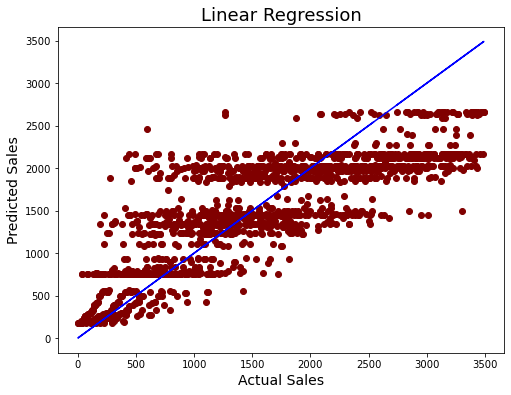

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=fmod_pred,color='maroon')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## Saving The model

In [89]:
import pickle
filename='Predicted_Bigmart_Sales.pkl'
pickle.dump(Final_Model,open(filename,'wb'))

We will now run our model on the test data

Lets load the our Final_Model pkl file and test data

In [90]:
loaded_model=pickle.load(open('Predicted_Bigmart_Sales.pkl','rb'))

### Taking Test file

EDA has been done, outliers and skewness has been removed from test file and taking the final test dataset for scaling and predicting target values.

In [91]:
test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,6.013715,0,176,13,2699,4,1,0,1,0,1
1,5.420535,1,4533,4,1814,7,1,1,1,0,1
2,5.837730,0,10452,11,7363,3,1,2,0,0,2
3,5.062595,0,1052,13,4499,7,1,1,1,0,1
4,5.780744,1,11418,4,7166,0,1,2,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5676,5.697093,1,765,13,3881,2,2,0,1,0,1
5677,5.192957,1,12464,15,5069,8,1,2,2,0,1
5678,5.680173,0,8450,8,3196,5,1,1,1,0,2
5679,5.869297,1,9673,3,6626,7,1,1,1,0,1


We have to Predict Item_Outlet_Sales which is target column. So droping Item_Outlet_Sales column from test dataset for now as we have put 0 values in that column For EDA of test data.

In [92]:
test1.drop(['Item_Outlet_Sales'],axis=1,inplace=True)
test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,6.013715,0,176,13,2699,4,1,0,1,1
1,5.420535,1,4533,4,1814,7,1,1,1,1
2,5.837730,0,10452,11,7363,3,1,2,0,2
3,5.062595,0,1052,13,4499,7,1,1,1,1
4,5.780744,1,11418,4,7166,0,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...
5676,5.697093,1,765,13,3881,2,2,0,1,1
5677,5.192957,1,12464,15,5069,8,1,2,2,1
5678,5.680173,0,8450,8,3196,5,1,1,1,2
5679,5.869297,1,9673,3,6626,7,1,1,1,1


In [93]:
sc_test=sc.fit_transform(test1)

In [94]:
X_tst=sc_test

In [95]:
X_tst=pd.DataFrame(X_tst,columns=test1.columns)
X_tst

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,0.739108,-0.740096,-1.699012,1.364610,-0.558904,0.078465,-0.285312,-1.369887,-0.252807,-0.193534
1,-0.282731,1.351175,-0.587250,-0.770760,-0.955349,1.177167,-0.285312,-0.139425,-0.252807,-0.193534
2,0.435948,-0.740096,0.923083,0.890083,1.530380,-0.287769,-0.285312,1.091037,-1.506207,1.720487
3,-0.899335,-0.740096,-1.475486,1.364610,0.247423,1.177167,-0.285312,-0.139425,-0.252807,-0.193534
4,0.337780,1.351175,1.169575,-0.770760,1.442132,-1.386471,-0.285312,1.091037,2.253993,-0.193534
...,...,...,...,...,...,...,...,...,...,...
5652,0.193681,1.351175,-1.548718,1.364610,-0.029416,-0.654003,1.380333,-1.369887,-0.252807,-0.193534
5653,-0.674767,1.351175,1.436479,1.839136,0.502760,1.543401,-0.285312,1.091037,1.000593,-0.193534
5654,0.164532,-0.740096,0.412239,0.178293,-0.336268,0.444699,-0.285312,-0.139425,-0.252807,1.720487
5655,0.490326,1.351175,0.724308,-1.008023,1.200234,1.177167,-0.285312,-0.139425,-0.252807,-0.193534


In [96]:
X_tst.shape

(5657, 10)

Passing our test model to predict target

In [97]:
Test_pred=loaded_model.predict(X_tst)
Y_tst=pd.DataFrame(data=Test_pred)

Y_tst

,0
0,1366.182255
1,1237.354347
2,548.308901
3,1901.566081
4,2663.458090
...,...
5652,1527.650582
5653,1966.241301
5654,1446.326360
5655,2120.940981


In [98]:
Y_tst.shape

(5657, 1)

Changing back to categorical form

In [99]:
test1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,6.013715,0,176,13,2699,4,1,0,1,1
1,5.420535,1,4533,4,1814,7,1,1,1,1
2,5.837730,0,10452,11,7363,3,1,2,0,2
3,5.062595,0,1052,13,4499,7,1,1,1,1
4,5.780744,1,11418,4,7166,0,1,2,3,1


In [100]:
test1.reset_index(inplace=True)
test1

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,0,6.013715,0,176,13,2699,4,1,0,1,1
1,1,5.420535,1,4533,4,1814,7,1,1,1,1
2,2,5.837730,0,10452,11,7363,3,1,2,0,2
3,3,5.062595,0,1052,13,4499,7,1,1,1,1
4,4,5.780744,1,11418,4,7166,0,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...
5652,5676,5.697093,1,765,13,3881,2,2,0,1,1
5653,5677,5.192957,1,12464,15,5069,8,1,2,2,1
5654,5678,5.680173,0,8450,8,3196,5,1,1,1,2
5655,5679,5.869297,1,9673,3,6626,7,1,1,1,1


In [101]:
Test_final=test1.join(Y_tst)
Test_final

,index,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,0
0,0,6.013715,0,176,13,2699,4,1,0,1,1,1366.182255
1,1,5.420535,1,4533,4,1814,7,1,1,1,1,1237.354347
2,2,5.837730,0,10452,11,7363,3,1,2,0,2,548.308901
3,3,5.062595,0,1052,13,4499,7,1,1,1,1,1901.566081
4,4,5.780744,1,11418,4,7166,0,1,2,3,1,2663.458090
...,...,...,...,...,...,...,...,...,...,...,...,...
5652,5676,5.697093,1,765,13,3881,2,2,0,1,1,1527.650582
5653,5677,5.192957,1,12464,15,5069,8,1,2,2,1,1966.241301
5654,5678,5.680173,0,8450,8,3196,5,1,1,1,2,1446.326360
5655,5679,5.869297,1,9673,3,6626,7,1,1,1,1,2120.940981


Now converting Categorical data back to its object dtype and renaming Y_tst column as Item_outlet_sales

In [102]:
#Droping extra index column
Test_final.drop(['index'],axis=1,inplace=True)

In [103]:
Test_final.rename(columns={0: 'Item_Outlet_Sales'}, inplace=True)
Test_final

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined,Item_Outlet_Sales
0,6.013715,0,176,13,2699,4,1,0,1,1,1366.182255
1,5.420535,1,4533,4,1814,7,1,1,1,1,1237.354347
2,5.837730,0,10452,11,7363,3,1,2,0,2,548.308901
3,5.062595,0,1052,13,4499,7,1,1,1,1,1901.566081
4,5.780744,1,11418,4,7166,0,1,2,3,1,2663.458090
...,...,...,...,...,...,...,...,...,...,...,...
5652,5.697093,1,765,13,3881,2,2,0,1,1,1527.650582
5653,5.192957,1,12464,15,5069,8,1,2,2,1,1966.241301
5654,5.680173,0,8450,8,3196,5,1,1,1,2,1446.326360
5655,5.869297,1,9673,3,6626,7,1,1,1,1,2120.940981
